# SMIT LILA
## CECS 457: Applied Machine Learning
## Project 2: Predicting Student Exam Scores (Linear Regression)


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import kagglehub

 # Download and Load Dataset

In [2]:
path = kagglehub.dataset_download("mahmoudelhemaly/students-grading-dataset")
data = pd.read_csv(f"{path}/Students_Grading_Dataset.csv")

# Display first 5 rows
data.head()

100%|██████████| 508k/508k [00:00<00:00, 1.29MB/s]

Extracting files...


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


# Data Cleaning

In [3]:
# Display first 5 rows
data.head()

# Data Cleaning (Handling Missing Values)
data = data.dropna(subset=['Study_Hours_per_Week', 'Attendance (%)', 'Final_Score'])

# Exploratory Data Analysis (EDA)
data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,4484.000000,4484.000000,4484.000000,4484.000000,4018.000000,4484.00000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000
mean,21.040589,75.431409,70.382083,69.752658,74.805219,74.88667,4.979186,74.930426,75.094282,17.643979,5.482382,6.493332
std,1.995009,14.372446,17.160392,17.192947,14.477361,14.50997,2.894988,14.350081,14.412443,7.253100,2.859238,1.456001
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.03000,0.000000,50.010000,50.020000,5.000000,1.000000,4.000000
25%,19.000000,63.265000,55.595000,54.852500,62.015000,62.46750,2.430000,62.375000,62.817500,11.500000,3.000000,5.200000
50%,21.000000,75.725000,70.490000,69.915000,74.790000,74.65000,4.935000,74.995000,75.325000,17.500000,5.000000,6.500000
75%,23.000000,87.472500,84.932500,84.752500,87.107500,87.55250,7.500000,87.200000,87.710000,24.100000,8.000000,7.800000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.96000,10.000000,100.000000,99.990000,30.000000,10.000000,9.000000


# Scatter plot of Study Hours vs Final Score

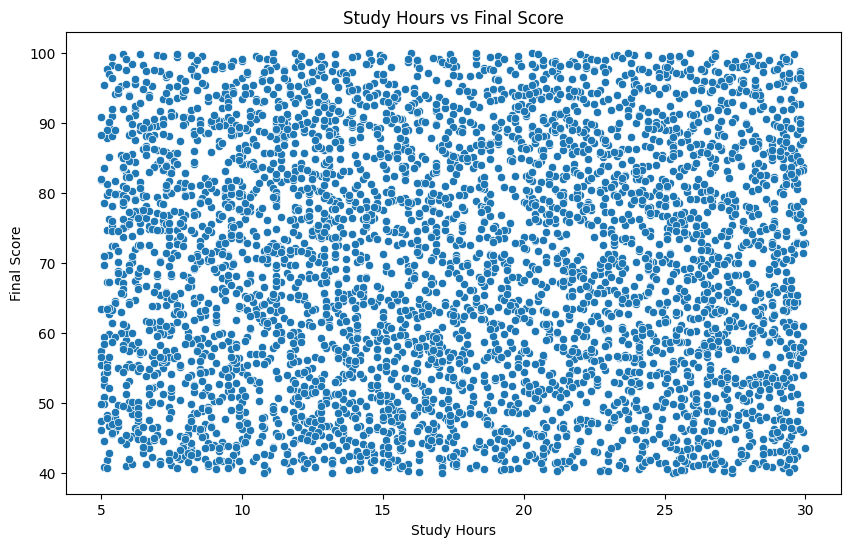

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_per_Week', y='Final_Score', data=data)
plt.title('Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.show()

# Scatter plot of Attendance Percentage vs Final Score


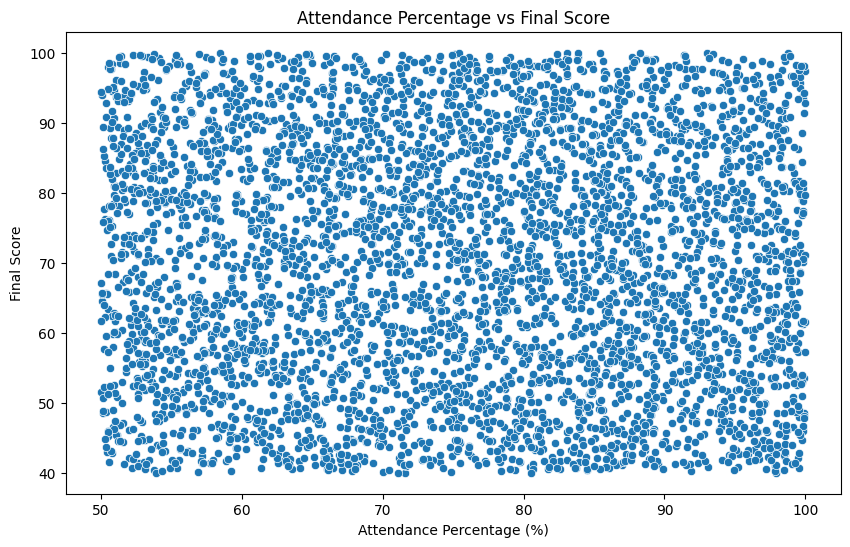

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance (%)', y='Final_Score', data=data)
plt.title('Attendance Percentage vs Final Score')
plt.xlabel('Attendance Percentage (%)')
plt.ylabel('Final Score')
plt.show()

# Prepare Data for Modeling

In [6]:
features = data[['Study_Hours_per_Week', 'Attendance (%)']]
target = data['Final_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)


In [8]:
# Evaluate Model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 292.38


# Visualization of Results

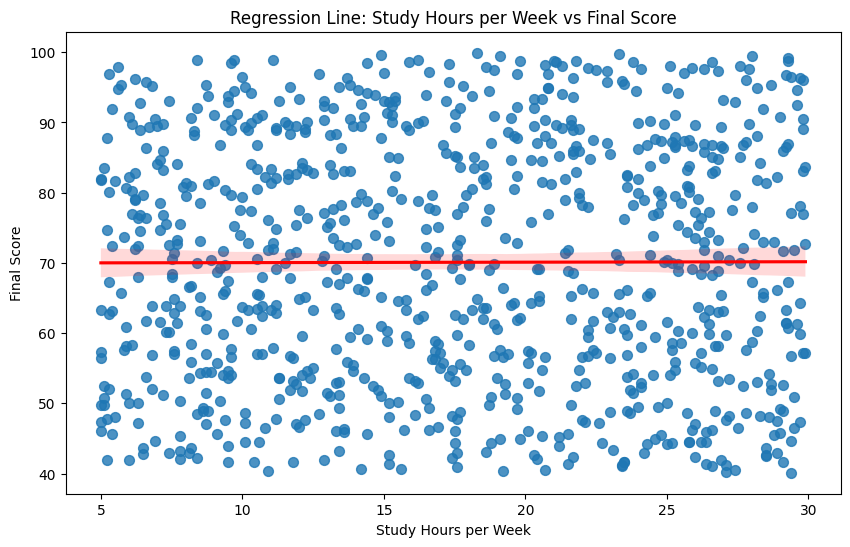

In [9]:
# Scatter plot with regression line for Study Hours
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['Study_Hours_per_Week'], y=y_test, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Regression Line: Study Hours per Week vs Final Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Score')
plt.show()


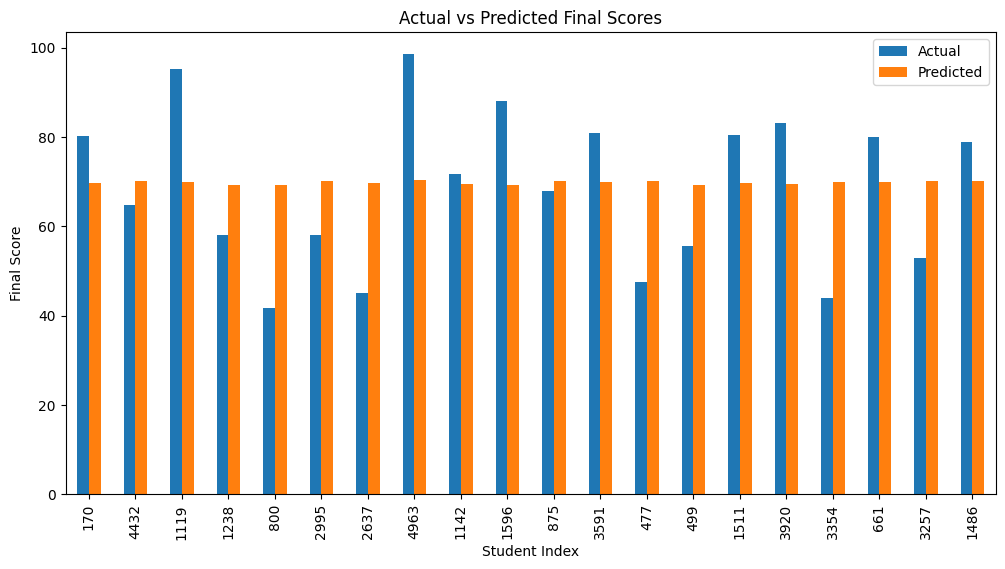

In [10]:
# Bar chart comparing predicted vs actual scores
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison_df = comparison_df.head(20)  # Comparing first 20 for readability

comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Final Scores')
plt.xlabel('Student Index')
plt.ylabel('Final Score')
plt.show()
